In [1]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
import math


Defining the functions of Butterworth low-pass filter

In [2]:
#Butterworth filter

def butter_lowpass(cutoff,fs,order=4):
  nyq=0.5 * fs
  nor_cutoff=cutoff/nyq
  b,a=sg.butter(order,nor_cutoff,btype='lowpass',analog=False)
  return b,a

def butter_lowpass_filter(data,cutoff,fs,order=4):
  b,a=butter_lowpass(cutoff,fs,order=order)
  y=sg.lfilter(b,a,data)
  return y

Generate the message signal, carrier signal and the Modulated signal

---


Coherent Modulation through product modulator

Text(0.5, 0, 'DSBSC signal')

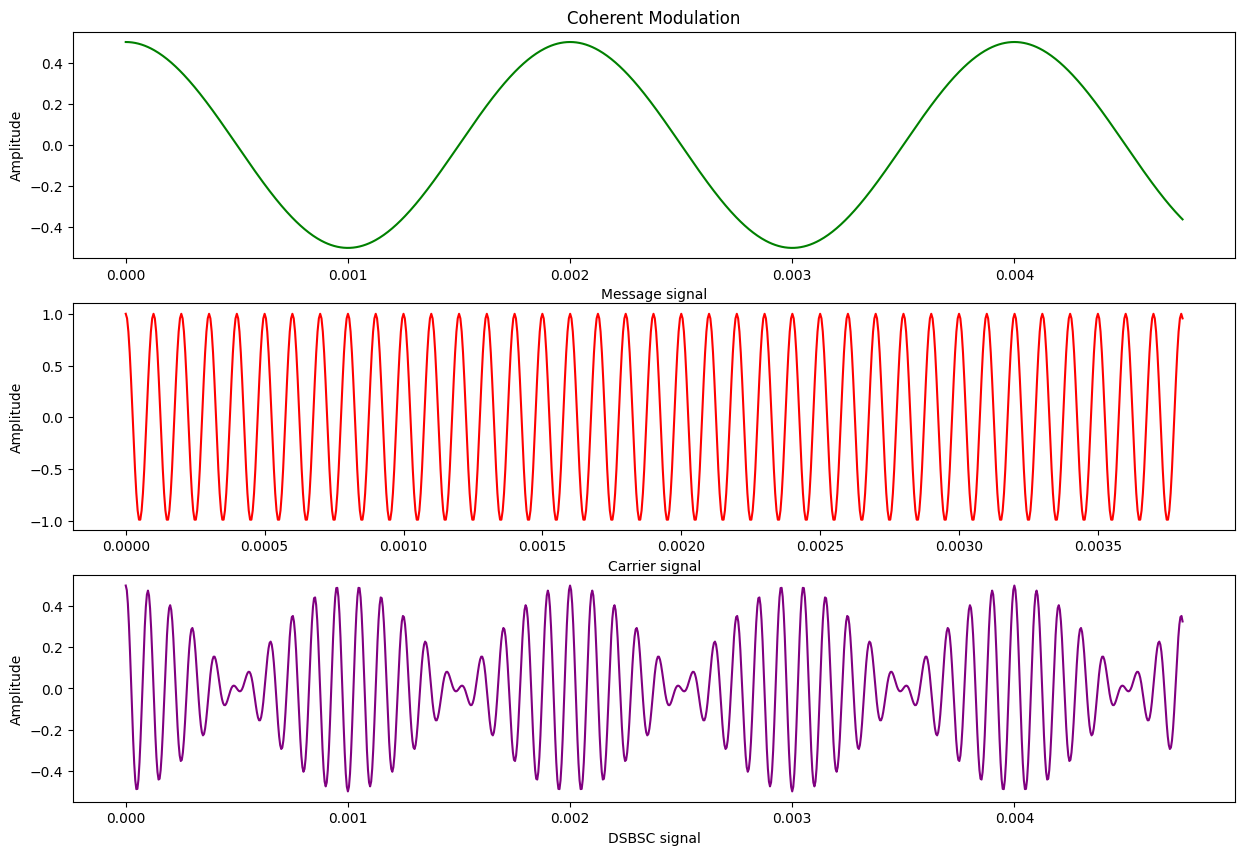

In [3]:
# message signal
Ac=1
Am=0.5
fc=10000
fm=500
N=1e6
fs=20*(fc+fm)
t=np.arange(N)/fs
cutoff=fm

carrier=Ac*np.cos(2*np.pi*fc*t)
message=Am*np.cos(2*np.pi*fm*t)
modulated=np.multiply(carrier,message)

plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.title('Coherent Modulation')
plt.plot(t[0:1000],message[0:1000],'g')
plt.ylabel('Amplitude')
plt.xlabel('Message signal')

plt.subplot(3,1,2)
plt.plot(t[0:800],carrier[0:800], 'r')
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')

plt.subplot(3,1,3)
plt.plot(t[0:1000],modulated[0:1000], color="purple")
plt.ylabel('Amplitude')
plt.xlabel('DSBSC signal')


Power Spectrum

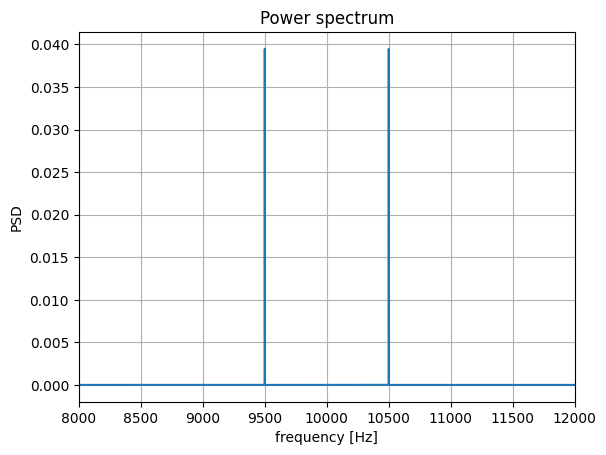

In [4]:
f, Pxx_spec = sg.welch(modulated, fs,'flattop', nperseg=N)
plt.plot(f, Pxx_spec)
plt.xlim(8000,12000)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.grid(True)
plt.title('Power spectrum')
plt.show()



(-12000.0, 12000.0)

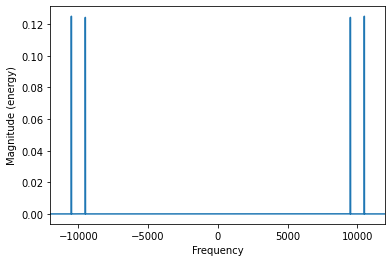

In [ ]:
plt.magnitude_spectrum(modulated, Fs=fs, sides='twosided')
plt.xlim(-12000,12000)

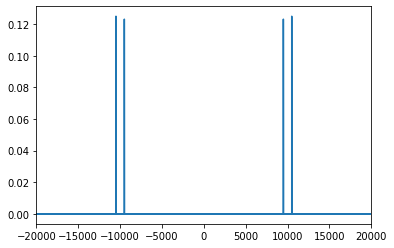

In [ ]:
from scipy.fft import fft, fftfreq

yf = fft(modulated/N)
xf = fftfreq(int(N),1/fs)
plt.xlim(-20000,20000)
plt.plot(xf, np.abs(yf))
plt.show()

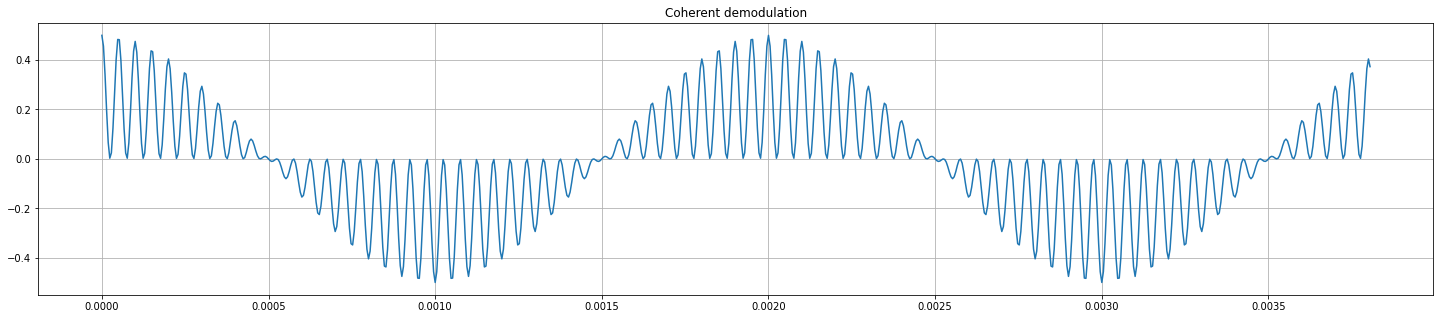

In [ ]:
#Coherent Demodulation
receiver=np.multiply(carrier,modulated)
plt.figure(figsize=(25,5))
plt.title('Coherent demodulation')
plt.plot(t[0:800],receiver[0:800])
plt.grid(True)

Using Butterworth filter to filter out the demodulated signal

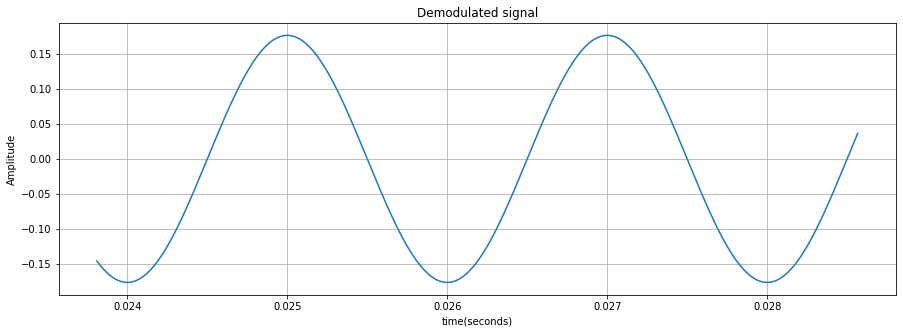

In [ ]:
#Finding out filtered signal

filtered=butter_lowpass_filter(receiver,cutoff,fs,order=4)
plt.figure(figsize=(15,5))
plt.plot(t[5000:6000],filtered[5000:6000],label='Filtered signal')
plt.xlabel('time(seconds)')
plt.ylabel('Amplitude')
plt.title('Demodulated signal')
plt.grid(True)

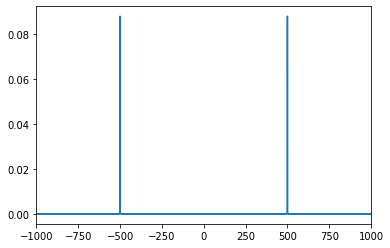

In [ ]:
from scipy.fft import fft, fftfreq

yf = fft(filtered/N)
xf = fftfreq(int(N),1/fs)
plt.xlim(-1000,1000)
plt.plot(xf, np.abs(yf))
plt.show()

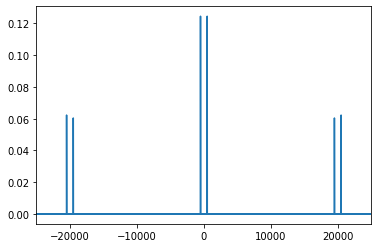

In [ ]:
gfrom scipy.fft import fft, fftfreq

yf = fft(receiver/N)
xf = fftfreq(int(N),1/fs)
plt.xlim(-25000,25000)
plt.plot(xf, np.abs(yf))
plt.show()